In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

## Experiment results loading

In [174]:
results_files = glob.glob('H:\\pred\\experiments\\benchmarks\\*.{type}'.format(type='csv'))
results = pd.DataFrame()
for file in results_files:
    csv = pd.read_csv(file)
    results = results.append(csv)
# sumplifiy llm names 
results=results.replace({'google/gemma-7b-it': 'gemma'}, regex=True)
results=results.replace({'mistralai/Mistral-7B-Instruct-v0.2': 'mistralai'}, regex=True)
results=results.replace({'meta-llama/Llama-2-7b-hf': 'llama'}, regex=True)
# Simplify encoders names
results=results.replace({'distiluse-base-multilingual-cased-v2': 'distiluse'}, regex=True)
results=results.replace({'dangvantuan/sentence-camembert-base': 'camembert'}, regex=True)
results=results.replace({'Lajavaness/sentence-flaubert-base': 'flaubert'}, regex=True)
results = results[results['llm'] != 'gemma']
results


,question,ref,response,score,time,llm,transformer,k
0,Qu'est-ce que Polytech Nantes ?,Polytech Nantes est une école d'ingénieurs pub...,Polytech Nantes est une école d'ingénieurs sit...,3.082689e-01,9.857143,mistralai,distiluse,3
1,Quand a été fondée l'école Polytech Nantes ?,L'école Polytech Nantes a été fondée en 2000.,L'école Polytech Nantes a été fondée en 2000.,-2.220446e-16,1.486257,mistralai,distiluse,3
2,Combien d'étudiants et de personnels l'école P...,L'école Polytech Nantes rassemble plus de 1 80...,Nous ne pouvons pas répondre à cette question ...,5.473194e-01,10.728487,mistralai,distiluse,3
3,Où sont situés les campus de Polytech Nantes ?,Les campus de Polytech Nantes sont situés à Na...,Les campus de Polytech Nantes sont situés à Na...,0.000000e+00,1.859739,mistralai,distiluse,3
4,Quels sont les avantages de choisir Polytech N...,Polytech Nantes offre des formations d'ingénie...,Les avantages de choisir Polytech Nantes sont ...,5.356090e-01,4.182326,mistralai,distiluse,3
...,...,...,...,...,...,...,...,...
95,Quelle est la particularité de Polytech Nantes?,Polytech Nantes se distingue par des formation...,Polytech Nantes est une école d'ingénierie de ...,2.857208e-01,10.324355,mistralai,flaubert,2
96,Quels sont les avantages de rejoindre Polytech...,Les avantages incluent des formations reconnue...,Les avantages de rejoindre Polytech Nantes son...,4.787661e-01,4.309658,mistralai,flaubert,2
97,Quelles sont les valeurs du réseau Polytech?,Les valeurs du réseau Polytech comprennent le ...,Les valeurs du réseau Polytech sont l'innovati...,4.011474e-01,10.321294,mistralai,flaubert,2
98,Quelle est la particularité de Polytech Nantes...,Chaque promotion d'ingénieur entrante à Polyte...,Polytech Nantes offre une forme de parrainage ...,3.408010e-01,4.691764,mistralai,flaubert,2


## Average time per llm, embedding, k

In [177]:
for res in results.groupby(['llm','transformer','k']):
    print("model {model} and embedding {enc} and (k={k})  average time : {time}".format(model =res[0][0], enc =res[0][1], time =res[1]['time'].mean(),k =res[1]['k'][0]))
    

model llama and embedding camembert and (k=2)  average time : 32.64786686800947
model llama and embedding camembert and (k=3)  average time : 32.98924640453223
model llama and embedding camembert and (k=4)  average time : 91.03602171185041
model llama and embedding distiluse and (k=2)  average time : 11.291915731430054
model llama and embedding distiluse and (k=3)  average time : 11.71758229970932
model llama and embedding distiluse and (k=4)  average time : 25.205450074672697
model llama and embedding flaubert and (k=2)  average time : 11.605884923934937
model llama and embedding flaubert and (k=3)  average time : 11.968497626781463
model llama and embedding flaubert and (k=4)  average time : 31.5801821046946
model mistralai and embedding camembert and (k=2)  average time : 7.378012919425965
model mistralai and embedding camembert and (k=3)  average time : 7.859257972240448
model mistralai and embedding camembert and (k=4)  average time : 8.601726248264313
model mistralai and embeddin

## Average scores per llm, embedding, k

In [178]:
for res in results.groupby(['llm','transformer','k']):
    print("model {model} and embedding {enc} and (k={k})  average score : {score}".format(model =res[0][0], enc =res[0][1], score =res[1]['score'].mean(),k =res[1]['k'][0]))
    

model llama and embedding camembert and (k=2)  average score : 0.5655072343180233
model llama and embedding camembert and (k=3)  average score : 0.5522640428383854
model llama and embedding camembert and (k=4)  average score : 0.5629168742569582
model llama and embedding distiluse and (k=2)  average score : 0.6601402545739196
model llama and embedding distiluse and (k=3)  average score : 0.635214710657573
model llama and embedding distiluse and (k=4)  average score : 0.6298831094104004
model llama and embedding flaubert and (k=2)  average score : 0.5194528544712977
model llama and embedding flaubert and (k=3)  average score : 0.5132900090506893
model llama and embedding flaubert and (k=4)  average score : 0.5206447641688777
model mistralai and embedding camembert and (k=2)  average score : 0.29604127934947144
model mistralai and embedding camembert and (k=3)  average score : 0.2675215861184039
model mistralai and embedding camembert and (k=4)  average score : 0.25166736176980176
model 

## Overall stats

<AxesSubplot:xlabel='llm,transformer,k'>

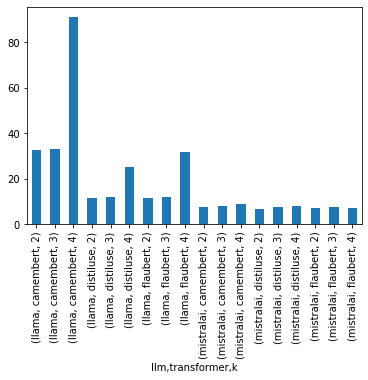

In [179]:
results.sort_values(by='time').groupby(['llm','transformer','k'])['time'].mean().plot(kind='bar')


<AxesSubplot:xlabel='llm,transformer,k'>

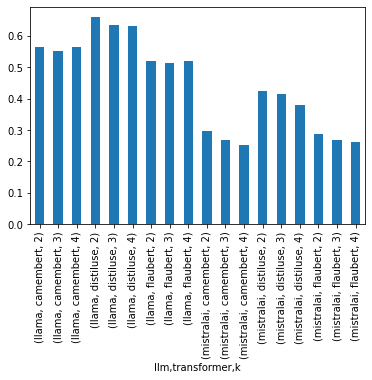

In [180]:
results.groupby(['llm','transformer','k'])['score'].mean().plot(kind='bar')
